In [ ]:
import pandas as pd
import lightgbm as lgb

In [ ]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/Daycon_sklearn_practice/영화 관객 수 예측 모델/data/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Daycon_sklearn_practice/영화 관객 수 예측 모델/data/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Daycon_sklearn_practice/영화 관객 수 예측 모델/data/submission.csv')

### **1. Exploratory Data Analysis (EDA)**

In [ ]:
# 탐색적 자료 분석
# Exploratory Data Analysis (EDA)
# 모델링을 위해 자료를 먼저 분석하는 과정이다.

In [ ]:
# pd.Dataframe.head() : 상위 5개 파일 정보를 불러온다.
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [ ]:
# pd.Dataframe.tail() : 파일 정보 중 가장 아래부터 하위 5개를 가져오도록 한다.
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [ ]:
test.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.0,1,4,4
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.0,1,68,7
242,조선안방 스캔들-칠거지악 2,(주) 케이알씨지,멜로/로맨스,2015-10-22,76,청소년 관람불가,이전,NaN,0,10,4


In [ ]:
submission.tail()

,title,box_off_num
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0
242,조선안방 스캔들-칠거지악 2,0


In [ ]:
# pd.DataFrame.shape() : 데이터 프레임의 행과 열 속성을 보는 기능
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


In [ ]:
# pd.DataFrame.info() : 데이터 프레임의 컬럼 별 정보를 알려주는 함수 -> 너무 수가 적은 정보는 아예 컬럼을 없애던지 아니면 정보를 더 추가하던지 해야함.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [ ]:
# pd.DataFrame.describe() : 숫자형 column들의 기술 통계량을 보여주는 함수이다.
# 기술통계량 : 해당 column을 대표할 수 있는 통계 값들을 의미한다.

In [ ]:
# 지수 승으로 표현되지 않고 보기 좋은 숫자로 표현된다.
pd.options.display.float_format = '{:.1f}'.format
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [ ]:
# pd.DataFrame.groupby() : 집단에 대한 통계량 확인

In [ ]:
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num') # 장르별로 categorizing을 진행 후, 각 그룹별 평균을 낸 후 정렬

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


In [ ]:
# 상관계수 : 두 개의 변수가 같이 일어나는 강도를 나타내는 수치
# -1에서 1사이의 값을 지니게 된다.
# -1이나 1인 수치는 현실 세계에서 관측되기 힘든 수치이다.
# 분야별로 기준을 정하는 것에 따라 달라지겠지만, 보통 0.4이상이면 두 개의 변수간에 상관성이 있다고 얘기한다.

In [ ]:
# pd.DataFrame.corr() : correlation coefficient의 줄임말
pd.reset_option('display.float_format')

In [ ]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


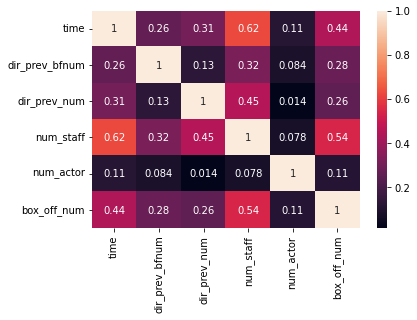

In [ ]:
import seaborn as sns
sns.heatmap(train.corr() , annot = True)
# staff의 수가 많을 수록 가장 Box_off_num 에 많은 영향을 미치는 것을 확인 할 수 있다. -> 어느 정보가 가장 영향력이 있는지 확인하는 절차

### **2. Preprocessing**

In [ ]:
# pd.Series.isna() : 결측치 여부를 확인해준다.
# 결측치이면 True, 결측치가 아니라면 False를 출력해준다.
# 결측치란 직역하면 '값이 없는 값'을 의미한다. 즉, 의미가 없거나 아예 값이 존재하지 않는 정보들을 거를 때 사용한다.
# 데이터 셋을 학습시키는 경우 결측 값이 존재하면 안되기 때문에 데이터 전처리시 중요하게 해줘야하는 부분이다.

In [ ]:
train.isna()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
595,False,False,False,False,False,False,False,False,False,False,False,False
596,False,False,False,False,False,False,False,False,False,False,False,False
597,False,False,False,False,False,False,False,True,False,False,False,False
598,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
train.isna().sum() # True는 1, False는 0으로 표기한다.

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [ ]:
train.isna().sum() / 600 # 결측 데이터 정도를 확인 할 수 있다.

title             0.00
distributor       0.00
genre             0.00
release_time      0.00
time              0.00
screening_rat     0.00
director          0.00
dir_prev_bfnum    0.55
dir_prev_num      0.00
num_staff         0.00
num_actor         0.00
box_off_num       0.00
dtype: float64

In [ ]:
train['dir_prev_bfnum'].isna() # 결측치가 많은 column의 index 값 들을 가져온다.
train[train['dir_prev_bfnum'].isna()] # 결측치가 많은 column의 실제 데이터들을 받아온다.
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum() # 이전에 감독이 맡았던 영화의 관객 수가 전부 0으로 누락되어 있는지 확인
# 정보가 누락된 정보들은 제외하고 진행

0

In [ ]:
# 결측 값으로 보여지는 자료들은 실제 관객 수가 0 이었다고 판단하고, 0으로 바꾸어 진행
# inplace value를 True로 설정해줘야 실제로 값이 바뀌어 들어감
# pd.DataFrame.fillna() : 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 한다.
train['dir_prev_bfnum'].fillna(0, inplace = True) 
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [ ]:
test.isna()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
238,False,False,False,False,False,False,False,False,False,False,False
239,False,False,False,False,False,False,False,True,False,False,False
240,False,False,False,False,False,False,False,True,False,False,False
241,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [ ]:
test['dir_prev_bfnum'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
238    False
239     True
240     True
241    False
242     True
Name: dir_prev_bfnum, Length: 243, dtype: bool

In [ ]:
test[test['dir_prev_bfnum'].isna()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,NaN,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,NaN,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5
8,아마존의 눈물 극장판,마운틴픽쳐스,다큐멘터리,2010-03-25,88,15세 관람가,김진만,NaN,0,76,1
9,반가운 살인자,롯데쇼핑(주)롯데엔터테인먼트,코미디,2010-04-08,107,15세 관람가,김동욱,NaN,0,255,3
...,...,...,...,...,...,...,...,...,...,...,...
235,타이밍,(주)스톰픽쳐스코리아,애니메이션,2015-12-10,100,15세 관람가,민경조,NaN,0,56,1
237,어떤이의 꿈,하준사,드라마,2015-11-26,72,12세 관람가,조성규,NaN,0,29,3
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4


In [ ]:
test[test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

In [ ]:
test['dir_prev_bfnum'].fillna(0, inplace=True)

In [ ]:
test.isna().sum() / 600

title             0.0
distributor       0.0
genre             0.0
release_time      0.0
time              0.0
screening_rat     0.0
director          0.0
dir_prev_bfnum    0.0
dir_prev_num      0.0
num_staff         0.0
num_actor         0.0
dtype: float64

# **3. Feature Engineering & Initial Modeling**

In [ ]:
# X (상영 시간, 영화 제작에 참여한 스태프 수, 배우 수,,,,) -> MODEL -> y (영화 관객 수)

In [ ]:
# lightgbm : Traning API / Scikit-learn API 두 가지를 제공하고 있다.
# Traning API : lightgbm의 고유 패키지에서 기본적으로 제공하는 문법을 사용하는 API
# Scikit-learn API : Scikit-learn과 문법 체계가 같도록 제공함
# EX. 모델 훈련 시, fit() method : Scikit-learn // train() method : lgbm -> Scikit-learn에 익숙한 사람들을 위해 제공함

In [ ]:
# random_state : 어떤 device에서 동작을 수행하던 같은 결과물을 산출하도록 하기 위해 설정.
# n_estimators : lgbm 모델의 특성 상 필요한 parameter이다.
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

In [ ]:
# LightGBM
# Light : 기타 부스트 모델에 비해 light라는 이름이 붙음 // BM : 부스팅모델
# 기존 모델이 못 맞춘 문제에 가중치를 두어 지속적으로 학습을 이어나감
# 타 부스팅 모델에 비해 속도가 빠름
# // single, bagging(ex. Randomforest), boosting(lgbm) 세 가지의 모델이 존재한다.
# // bagging : 병렬적으로 프로세스를 진행
# // boosting : 순차적으로 프로세스를 진행 -> 이전에 예측을 잘 못한 부분에 대해 가중치를 두어 학습을 이어나가기 때문

In [ ]:
# 입력 값인 features, 결과 값인 target 값을 지정
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor']
target = ['box_off_num']

In [ ]:
# 데이터 분리 및 저장
X_train, X_test, y_train = train[features], test[features], train[target]

# **4. Model Tunning & Evaluation**

* **경진대회 등에서 가장 많이 사용되는 4가지 모델** \
a) LightGBM (base model)\
b) K-fold lightGBM (k-fold model) -> 교차 검증\
c) feature engineering (fe) -> feature을 더 추가하여 k-fold model에 적용시켜본다.\
d) grid search (hyperparameter tunning) -> 하이퍼 파라미터 최적화 기법을 활용하여 모델을 생성


#**LightGBM**

In [ ]:
# 모델 학습
model.fit(X_train, y_train)

LGBMRegressor(n_estimators=1000, random_state=777)

In [ ]:
# Submission copy
singleLGBM = submission.copy()

In [ ]:
singleLGBM.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [ ]:
# 학습된 모델로 결과 값 예측
singleLGBM['box_off_num'] = model.predict(X_test)

In [ ]:
# 예비 Submission 저장
# 여기 까지만 사용하면 모델 성능이 매우 안좋기 때문에 모델에 더 작업을 진행한다.
singleLGBM.to_csv('singleLGBM.csv', index = False)

#**K-fold cross Validation**
- 과대적합 방지
- 모델 간 일반적인 성능 비교
- Validation Set, Development Set 이라고 불리기도 함

In [ ]:
# 교차검증을 위해 라이브러리를 불러옴
from sklearn.model_selection import KFold

In [ ]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [ ]:
# 데이터를 그대로 사용하지 않고 Shuffling 을 진행한 후에 데이터를 사용
# 데이터의 순서에 의해 영향을 받을 수 있기 때문
# 시계열 데이터를 사용할 경우는 Shuffling 을 진행하지 않는다.
# n_splits = 5 -> 즉 모델을 5개로 구성하겠다는 의미이다.
k_fold = KFold(n_splits=5, shuffle=True, random_state=777)

# 입력 값이 5등분 된 것을 볼 수 있다.
for train_idx, val_idx in k_fold.split(X_train):
  print(len(train_idx))
  print(len(val_idx))
  break

480
120


In [ ]:
# n_estimators : 모델을 총 1000번을 구성할 것이다.
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

models = []

# iloc : 행 단위로 데이터 프레임안의 데이터를 가져오라는 의미이다.
for train_idx, val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]

  # 학습 데이터는 앞에 그냥 넣어주면 되고, Validation data는 eval_set안에 넣어주면 된다.
  # early_stopping_rounds : 100번의 과정동안 모델의 유의미한 성능 증가 관측이 일어나지 않는다면,
  # 학습을 멈추라는 의미이다. -> 평가는 Validation Set으로 진행한다.
  # verbose -> 100번째 모델마다 모델의 성능을 출력해달라는 의미이다.
  models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose=100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.70572e+12
Early stopping, best iteration is:
[6]	valid_0's l2: 2.45438e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.90847e+12
Early stopping, best iteration is:
[33]	valid_0's l2: 3.72825e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.50344e+12
Early stopping, best iteration is:
[8]	valid_0's l2: 2.58737e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.45977e+12
Early stopping, best iteration is:
[11]	valid_0's l2: 1.26226e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.77214e+12
Early stopping, best iteration is:
[22]	valid_0's l2: 1.57631e+12


In [ ]:
preds = []
for model in models:
  preds.append(model.predict(X_test))
# preds 에는 5개의 각 모델에 X_test 값으로 예측한 243개의 값들이 각각 들어있게 된다.

243

In [ ]:
kfoldLightGBM = submission.copy()

In [ ]:
import numpy as np
kfoldLightGBM

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
# pred의 값들을 각각 평균을 내겠다는 의미이다.
kfoldLightGBM['box_off_num'] = np.mean(preds, axis = 0)

In [ ]:
kfoldLightGBM.head()

,title,box_off_num
0,용서는 없다,3.367422e+06
1,아빠가 여자를 좋아해,9.611389e+05
2,하모니,1.097930e+06
3,의형제,2.097271e+06
4,평행 이론,7.814763e+05


In [ ]:
kfoldLightGBM.to_csv('kfoldLightGBM.csv', index = False)

#**Feature Engineering - Add more feature to improve model's ability**

In [ ]:
features

['time', 'dir_prev_num', 'num_staff', 'num_actor']

In [ ]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [ ]:
# genre 와 dir_prev_bfnum 을 활용
# genre 는 문자열이기 때문에 숫자열로 인코딩을 진행해줘야한다.

In [ ]:
# LabelEncoder() : 문자열을 숫자로 인코딩 해주는 매서드
# fit_transfrom : 각각의 문자열에 대해 개별 숫자로 인코딩하여 값을 치환하며 기계가 해당 문자열과 숫자의 관계를 학습하도록 하는 매서드이다.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['genre'] = le.fit_transform(train['genre'])

In [ ]:
train['genre']

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int64

In [ ]:
# 이미 train의 genre에서 fit_transform() 매서드를 통해 문자열과 숫자 사이의 관계성을 확인했기 때문에 transform() 매서드만 사용하면 된다.
# 여기서 다시 학습을 하게 되면 train 데이터 규칙과 test 데이터 규칙이 달라지기 때문에 일치 시켜주는 것이 중요하다.
test['genre'] = le.transform(test['genre'])

In [ ]:
test['genre']

0       2
1       5
2       4
3      10
4       1
       ..
238     4
239     3
240     2
241     4
242     5
Name: genre, Length: 243, dtype: int64

In [ ]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'dir_prev_bfnum', 'genre']

In [ ]:
X_train, X_test, y_train = train[features], test[features], train[target]

In [ ]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=100)
models = []

# iloc : 행 단위로 데이터 프레임안의 데이터를 가져오라는 의미이다.
for train_idx, val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]

  models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose=100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.62067e+12
Did not meet early stopping. Best iteration is:
[9]	valid_0's l2: 2.42668e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4.39227e+12
Did not meet early stopping. Best iteration is:
[23]	valid_0's l2: 3.97173e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.29841e+12
Did not meet early stopping. Best iteration is:
[10]	valid_0's l2: 2.53643e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.56499e+12
Did not meet early stopping. Best iteration is:
[16]	valid_0's l2: 1.21201e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.60118e+12
Did not meet early stopping. Best iteration is:
[29]	valid_0's l2: 1.47528e+12


In [ ]:
preds=[]
for model in models:
  preds.append(model.predict(X_test))
len(preds)

5

In [ ]:
feLightGBM = submission.copy()

In [ ]:
feLightGBM['box_off_num'] = np.mean(preds, axis = 0)

In [ ]:
feLightGBM.to_csv('feLightGBM.csv', index = False)

#**Model Tunning - Grid Search**

In [ ]:
# 가장 대표적으로 사용하는 튜너로는 Grid Search가 있다.
# model의 옵션을 설정하는 hyper parameter들이 굉장히 많다.
# hyper parameter의 조합 중 검증 오차율이 가장 작은 case를 구하는 것이 Tunning의 목적이라고 할 수 있다.
from sklearn.model_selection import GridSearchCV

In [ ]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

# learning_rate : boosting model에서 순차적으로 진행할 때 기존 모델의 성능을 다음 모델에 얼마만큼 반영할지 정하는 것이다.
# parameter를 3x2=6 개 중 가장 검증 오차가 적은 모델을 찾는다고 생각하면 된다.
params = {
    'learning_rate': [0.1, 0.01, 0.003],  # 3
    'min_child_samples': [20, 30]         # 2
}

# scoring => 모델의 성능을 평가하는 지표 : 결과물을 평가하는 지표에 따라 다르게 스코어링 하여 모델을 튜닝하면 된다.
# cv -> cross-validation을 의미
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  scoring='neg_mean_squared_error',
                  cv=k_fold)

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=LGBMRegressor(n_estimators=1000, random_state=777),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [ ]:
gs.best_params_

{'learning_rate': 0.003, 'min_child_samples': 30}

In [ ]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000, learning_rate=0.003, min_child_samples=30)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]

    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.56673e+12
[200]	valid_0's l2: 2.45583e+12
[300]	valid_0's l2: 2.42575e+12
[400]	valid_0's l2: 2.43392e+12
Early stopping, best iteration is:
[335]	valid_0's l2: 2.42348e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4.89194e+12
[200]	valid_0's l2: 4.40922e+12
[300]	valid_0's l2: 4.19146e+12
[400]	valid_0's l2: 4.05951e+12
[500]	valid_0's l2: 3.96931e+12
[600]	valid_0's l2: 3.91727e+12
[700]	valid_0's l2: 3.88462e+12
[800]	valid_0's l2: 3.87695e+12
[900]	valid_0's l2: 3.87088e+12
Early stopping, best iteration is:
[876]	valid_0's l2: 3.87035e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.14361e+12
[200]	valid_0's l2: 2.79286e+12
[300]	valid_0's l2: 2.59302e+12
[400]	valid_0's l2: 2.47608e+12
[500]	valid_0's l2: 2.40386e+12
[600]	valid_0's l2: 2.36407e+12
[700]	valid_0's l2: 2.38505e+12
Early stopping, best iteration is:
[6

In [ ]:
preds = []
for model in models:
  preds.append(model.predict(X_test))

In [ ]:
gs.best_score_

-2334525343085.6494

In [ ]:
gsLGBM = submission.copy()

In [ ]:
gsLGBM['box_off_num'] = np.mean(preds, axis = 0)

In [ ]:
gsLGBM.to_csv('gsLGBM.csv', index=False)

In [ ]:
# gs 모델이 fe모델보다 더 성능이 좋지 않게 도출 되었는데
# Train data 양이 적었기 때문일 확률이 높다.
# 그렇기 때문에 처리를 하는 과정에서 여러 검증 과정이 필요하다는 것을 알 수 있다.
# 다양한 column들을 이용해서 성능을 더 올리는 방법도 존재한다.